4.1 考察一元目标函数$F(w)=w^2-w+1$。设初始值$w= 0$。请给出梯度下降算法在最小化该目标函数F时的搜索轨迹。

epoch 1, w: 0.2:
epoch 2, w: 0.32:
epoch 3, w: 0.392:
epoch 4, w: 0.43520000000000003:
epoch 5, w: 0.46112000000000003:
epoch 6, w: 0.47667200000000004:
epoch 7, w: 0.4860032:
epoch 8, w: 0.49160192:
epoch 9, w: 0.494961152:
epoch 10, w: 0.4969766912:


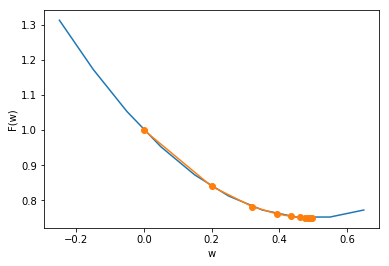

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def gd(eta):
    w = 0
    results = [w]
    for i in range(10):
        w -= eta * (2 * w - 1) 
        print('epoch {}, w: {}:'.format(i+1, w))
        results.append(w)
    return results

res = gd(0.2) # set lr = 0.2
def show_trace(res):
    f_line = np.arange(-0.25, 0.75, 0.1)
    plt.plot(f_line, [w * w - w + 1 for w in f_line])
    plt.plot(res, [w * w - w + 1 for w in res], '-o')
    plt.xlabel('w')
    plt.ylabel('F(w)')
    plt.show()
show_trace(res)

4.2 考察一元目标函数 $F(w)= (w- 1)^2$ 。设初始值$w= 0$。请给出牛顿迭代算法在最小化该目标函数$F$时的搜索轨迹。

epoch 1, w: 0.5:
epoch 2, w: 0.75:
epoch 3, w: 0.875:
epoch 4, w: 0.9375:
epoch 5, w: 0.96875:
epoch 6, w: 0.984375:
epoch 7, w: 0.9921875:
epoch 8, w: 0.99609375:
epoch 9, w: 0.998046875:
epoch 10, w: 0.9990234375:


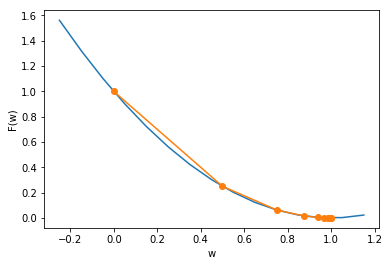

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def f(w):
    return (w-1) ** 2
def nia(): # Newton iterator algorithm
    w = 0
    results = [w]
    for i in range(10):
        w -=  f(w)/(2 * (w - 1))
        print('epoch {}, w: {}:'.format(i+1, w))
        results.append(w)
    return results

res = nia() 
def show_trace(res):
    f_line = np.arange(-0.25, 1.25, 0.1)
    plt.plot(f_line, [w * w - 2*w + 1 for w in f_line])
    plt.plot(res, [w * w - 2*w + 1 for w in res], '-o')
    plt.xlabel('w')
    plt.ylabel('F(w)')
    plt.show()
show_trace(res)

4.3 请证明以下次梯度的性质。 设$F、G、R$是$n$元实函数。  
  
(1) 如果$F(w) = λG(w)$, $\forall w\in \mathbb{R}^n$,则$\partial F(w) = \{λv:v\in \partial G(w)\}$。  
  
(2) 如果$F(w) = G(w)+ R(w),\forall w\in \mathbb{R}^n$ ,则$\partial F(w)= \{v+ u:v\in \partial G(w) ,u\in \partial R(w)\}$。

(1):
$$
\partial F(w)= \partial (\lambda G(w))= \{λv:v\in \partial G(w)\}
$$
(2):
$$
\partial F(w)=\partial (G(w)+R(w))= \{v+ u:v\in \partial G(w) ,u\in \partial R(w)\}
$$

4.4 试述如何用次梯度来代替梯度,将随机梯度下降算法与小批量梯度下降算法推广到目标函数不可微的情形。对 Lasso 回归问题,如何用上述推广的随机梯度下降算法与小批量梯度下降算法求解? 

将随机梯度下降算法和小批量随机梯度下降算法中的梯度换成次梯度，在目标函数不可微处随机从次梯度集中随机选择一个次梯度作为该点的梯度。  
Lasso with SGD：
每一轮循环随机选择一个样本计算梯度，当Lasso的目标函数不可微时，即w=0时，正则化项梯度为0
Lasso with MBGD：
每一轮循环随机选择一批样本计算梯度，其他与SGD一样

4.5 本章中关注的是最小化问题。然而,梯度下降算法也可以用于最大值的计算问题。有时也称计算最大值的梯度下降算法为梯度上升算法。设$F:\mathbb{R}^n\to R$是一个$n$元函数。请描述关于计算最大值max $F(w)$的梯度下降算法以及相应的次梯度下降算法。

梯度下降算法：  
$ w = 0 $  
for $t = 1,2,…,N$:  
&emsp;&emsp; $w\leftarrow w + \eta \nabla F(w)$  
return $w$     
次梯度下降算法：  
$ w = 0, w_{sum}=0 $  
for $t = 1,2,…,N$:  
&emsp;&emsp; randomly pick $v \in \partial F(w)$  
&emsp;&emsp; $w\leftarrow w + \eta v$  
&emsp;&emsp; $w_{sum}\leftarrow w_{sum}+w$  
return $\overline{w}=w_{sum}/N$

4.6 感知器算法与次梯度下降。  
在第2章中学习了感知器算法。感知器算法的目标函数为  
$$
\max\limits_{w,b}\frac {1}{m}\sum\limits_{i=1}^{m} y^{(i)} Sign(\langle w, x^{(i)}\rangle + b)
$$
这个目标函数是一个非处处可微的函数。请说明如何用次梯度下降算法来优化感知器算法的目标函数。

答：不会做

4.7 弹性网回归算法。  
弹性网回归算法是线性回归问题的一种正则化算法。它结合了$L_1$正则化与$L_2$正则化  
两种方法。它的目标函数为  
$$
\min\limits_{w\in \mathbb{R}^n}F(w) = \frac {1}{m} \|Xw - y\|^2 + r\lambda |w| + (1- r)\lambda \|w\|^2
$$
其中, $\lambda≥0$是正则化因子。$0≤r≤1$是弹性系数。请用坐标下降算法来优化感知器算法中的目标函数。

用$f(u)$表示单变量函数$F(u,w_{-j})$，则可以将$f(u)$写成如下形式：
$$
f(u)=\frac{1}{m}\sum_{i=1}^{m}(ux_j^{(i)}+<w_{-j},x_{-j}^{(i)}>-y^{(i)})^2+r\lambda|u|+r\lambda|w_{-j}|+(1-r)\lambda u^2+(1-r)\lambda||w_{-j}||^2
$$
定义
$$
\alpha_j=\frac{2}{m}\sum_{i=1}^{m}(x_j^{(i)})^2,\quad \beta_j=\frac{2}{m}\sum_{i=1}^{m}x_j^{(i)}e_j^{(j)}
$$
则次梯度$\partial f(u^*)$有如下形式
$$
\partial f(u^*)=
\left\{  
             \begin{array}{**lr**}  
             \{[\alpha_j+2(1-r)\lambda]u+\beta_j+r\lambda\}, 如果u>0  \\  
             [\beta_j-r\lambda,\beta_j+r\lambda], \qquad\qquad\quad \ \ 如果u=0\\  
            \{[\alpha_j+2(1-r)\lambda]u+\beta_j-r\lambda\} ,如果u<0 
             \end{array}  
\right.
$$
根据推论4.2的结论可得
$$
u^*=
\left\{  
             \begin{array}{**lr**}  
             -\frac{\beta_j+r\lambda}{\alpha_j+2(1-r)\lambda},\ 如果\beta_j<-r\lambda  \\  
             0, \qquad \qquad \ \ \ 如果-r\lambda\le \beta_j \le  r\lambda\\  
            -\frac{\beta_j-r\lambda}{\alpha_j+2(1-r)\lambda} ,\ 如果\beta_j>-r\lambda
             \end{array}  
\right.
$$


4.8 鲁棒回归算法。  
第3章的习题3.7中的RANSAC算法是一个能够对抗小量异常数据干扰的回归算法。鲁棒回归算法是另一个这样的算法。其原理是,当预测值与真实标签相差较大时,采用绝对值损失,而绝对值损失受到异常数据的干扰较小。具体来说,鲁棒回归算法的模型假设是线性模型。损失函数是如下定义的Hubber损失:
$$
C=
\left\{
             \begin{array}{**lr**}  
             (y-z)^2, & |y-z| < \varepsilon \\
             2\varepsilon |y-z|-\varepsilon ^2, & |y-z| \geq \varepsilon
             \end{array}  
\right.
$$
其中,$\varepsilon (\varepsilon > 0)$是一个常数。图4.27是当$\varepsilon =0.5$时的Hubber损失的图像。
![4.27](./4.27.png)  
请用次梯度下降算法实现鲁棒回归算法,并应用于习题3.7的数据上。

In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
def generate_samples(m, k):
    X_normal = 2 * (np.random.rand(m, 1) - 0.5)
    y_normal = X_normal + np.random.normal(0, 0.1, (m, 1))
    X_outlier = 2 * (np.random.rand(k, 1) - 0.5)
    y_outlier = X_outlier + np.random.normal(3, 0.1, (k, 1))
    X = np.r_[X_normal, X_outlier]
    y = np.r_[y_normal, y_outlier]
    return X, y
np.random.seed(0)
X, y = generate_samples(100, 5)

In [46]:
w=0
b=0
lr=0.05
epsilon=0.5
N=1000

In [47]:
for t in range(N):
    grad_w = grad_b = 0
    for i in range(len(X)):
        if abs(w * X[i] + b - y[i]) < epsilon:
            grad_w += 2 * X[i] * (w * X[i] + b - y[i])
            grad_b += 2 * (w * X[i] + b - y[i])
        else:
            grad_w += 2 * epsilon * X[i] * np.sign(w * X[i] + b - y[i])
            grad_b += 2 * epsilon * np.sign(w * X[i] + b - y[i])
    grad_w /= len(X)
    grad_b /= len(X)
    w -= lr * grad_w
    b -= lr * grad_b

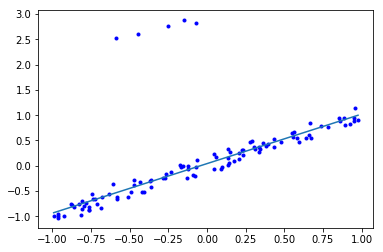

In [48]:
plt.plot(X, y, 'b.')
plt.plot((min(X),max(X)),(w*min(X)+b,w*max(X)+b))
plt.show()

4.9 梯度下降算法的收敛速度。 
  
设$F:\mathbb {R}^n \to \mathbb{R}$是一个$n$元凸函数。假设$F$的Hessian方阵$\nabla ^2F$满足条件$\alpha I \preccurlyeq \nabla ^2F \preccurlyeq\beta I$。即,方阵$\nabla ^2F-\alpha I$与$\beta I- \nabla ^2F$均半正定。  
  
(1) 请证明：对任意的$w, u \in \mathbb{R}^n$,有  
$$
F(u)\geq F(w)+\nabla F(w)^T(u-w)+\frac {\alpha }{2}\|u-w\|^2 \qquad\qquad\qquad\qquad(4.33) \\
F(u)\leq F(w)+\nabla F(w)^T(u-w)+\frac {\beta }{2}\|u-w\|^2 \qquad\qquad\qquad\qquad(4.34)
$$
  
(2) 采用梯度下降算法计算函数$F$的最小值。取定学习速率为$\eta = 1/\beta $。设算法在第t步搜索到的点为$w^{(i)}$。根据梯度下降算法原理有$w^{(t+1)} = w^{(t)} - \eta \nabla F(w^{(t)})$。请利用式(4.34)证明如下结论:  
  
$$
F(w^{(t+1)}) \leq F(w^{(t)}) - \frac {1}{2\beta }\|\nabla F(w^{(t)})\|^2\qquad\qquad\qquad\qquad(4.35)
$$  
  
(3) 设$f^* = min F(w)$是$F$的最小值。请利用式(4.33)证明,对任意的$w^{(t)}$,都有 
  
$$
f^* \geq F(w^{(t)}) - \frac {1}{2\alpha }\|\nabla F(w^{(t)})\|^2\qquad\qquad\qquad\qquad(4.36)
$$  
  
(4) 请结合式(4.35)与式(4.36)证明,对任意的$\varepsilon > 0$,当  
  
$$
t > \frac {\log ((F(w^{(0)}) - f^*)/\varepsilon)}{\log (\beta /(\beta -\alpha))}
$$  
  
时,有$F(w^{(t)}) - f^* < \varepsilon $。此时,称梯度下降算法收敛了。

证明：
（1）根据多元函数泰勒展开公式可得：
$$
F(u)=F(w)+\nabla F(w)^T(u-w)+\frac{1}{2}(u-w)^T\nabla ^2 F(w)(u-w)
$$
因为$\alpha I \preccurlyeq \nabla ^2F \preccurlyeq\beta I$，所以
$$
\alpha||u-w||^2\le(u-w)^T \nabla F(w) (u-w) \le \beta ||u-w||^2
$$
所以，对任意的$w, u \in \mathbb{R}^n$,有  
$$
F(u)\geq F(w)+\nabla F(w)^T(u-w)+\frac {\alpha }{2}\|u-w\|^2 \qquad\qquad\qquad\qquad(4.33) \\
F(u)\leq F(w)+\nabla F(w)^T(u-w)+\frac {\beta }{2}\|u-w\|^2 \qquad\qquad\qquad\qquad(4.34)
$$
（2）由式(4.34)可得
$$
F(w^{(t+1)})\le F(w^{(t)})-\eta\nabla F(w^{(t)})^T\nabla F(w^{(t)})+\frac{\beta}{2}\eta^2||\nabla F(w^{(t)})||^2
$$
因为$\eta = \frac{1}{\beta}$，所以
$$
F(w^{(t+1)})\le F(w^{(t)})-\frac{||\nabla F(w^{(t)})||^2}{\beta}+\frac{1}{2\beta}||\nabla F(w^{(t)})||^2\\
F(w^{(t+1)})\le F(w^{(t)})-\frac{1}{2\beta}||\nabla F(w^{(t)})||^2
$$
（3）令$f^*=F(w^{(T)})$，$w^{(T)}=w^{(t)}-\eta(\nabla F(w^{(t)})+\nabla F(w^{(t+1)})+...+\nabla F(w^{(T-1)}))=w^{(t)}-\xi\nabla F(w^{(t)})$， 则：
$$
\begin{equation*}%加*表示不对公式编号
\begin{split}
f^*&\geq F(w^{(t)})+\nabla F(w^{(t)})^T(w^{(T)}-w^{(t)})+\frac {\alpha }{2}\|w^{(T)}-w^{(t)}\|^2\\
&= F(w^{(t)})-\xi\|\nabla F(w^{(t)})\|^2+\frac{\alpha}{2}\xi^2\|\nabla F(w^{(t)})\|^2\\
&= F(w^{(t)})+\|\nabla F(w^{(t)})\|^2(\frac{\alpha}{2}\xi^2-\xi)\\
&= F(w^{(t)})+\|\nabla F(w^{(t)})\|^2[\frac{(\alpha\xi-1)^2}{2\alpha}-\frac{1}{2\alpha}]\\
&\geq F(w^{(t)})-\frac{1}{2\alpha}\|\nabla F(w^{(t)})\|^2\\
\end{split}
\end{equation*}
$$
（4）由式(4.35)与式(4.36)得：
$$
\left\{  
             \begin{array}{**lr**}  
             F(w^{(t)})-F(w^{(t+1)}) \ge \frac {\|\nabla F(w^{(t)})\|^2}{2\beta} \qquad \\
             F(w^{(t)})-f^* \le \frac {\|\nabla F(w^{(t)})\|^2}{2\alpha}\qquad\qquad\ \ \ \ 
             \end{array}  
\right.
$$
两式相除得
$$
\frac{F(w^{(t)})-F(w^{(t+1)})}{F(w^{(t)})-f^*}\ge\frac{\alpha}{\beta}\\
$$
整理得
$$
\frac{F(w^{(t)})-f^*}{F(w^{(t+1)})-f^*}\ge\frac{\beta}{\beta-\alpha}\\
\frac{F(w^{(t-1)})-f^*}{F(w^{(t)})-f^*}\ge\frac{\beta}{\beta-\alpha}\\
.\\.\\.\\
\frac{F(w^{(0)})-f^*}{F(w^{(1)})-f^*}\ge\frac{\beta}{\beta-\alpha}
$$
将上述后$t$个不等式累乘得
$$
\frac{F(w^{(0)})-f^*}{F(w^{(t)})-f^*}\ge(\frac{\beta}{\beta-\alpha})^t\\
F(w^{(t)})-f^*\le\frac{F(w^{(0)})-f^*}{(\frac{\beta}{\beta-\alpha})^t}\\
$$
当
$$
t > \frac {\log ((F(w^{(0)}) - f^*)/\varepsilon)}{\log (\beta /(\beta -\alpha))}
$$
时，
$$
\frac{F(w^{(0)})-f^*}{(\frac{\beta}{\beta-\alpha})^t} < \varepsilon
$$
则
$$
F(w^{(t)})-f^* < \varepsilon
$$